# Mixed-integer program example
Now, let us consider the following mixed-integer program:

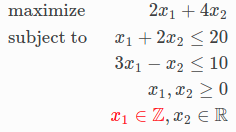

## Installing the packages

In [1]:
%%capture
!pip install gurobipy

Afterwards, we can install hips.

In [2]:
%%capture
!pip install https://github.com/cxlvinchau/hips/archive/master.zip

## Example

In [3]:
from hips.solver import GurobiSolver
from hips.models import MIPModel
from hips import ProblemSense, VarTypes

/usr/local/lib/python3.7/dist-packages/hips/solver/__init__.py:11: UserWarning: CyLP does not seem to be installed
  warnings.warn("CyLP does not seem to be installed")


**Create solver**

In [4]:
solver = GurobiSolver()

Restricted license - for non-production use only - expires 2022-01-13


**Create MIP model**

In [5]:
model = MIPModel(solver)

**Create variables with lower bound 0**

In [6]:
# Integer variable
x_1 = model.add_variable("x_1", lb=0, ub=20, var_type=VarTypes.INTEGER)
# Continuous variable
x_2 = model.add_variable("x_2", lb=0)

**Add constraints**

In [7]:
model.add_constraint(x_1 + 2*x_2 <= 20)
model.add_constraint(3*x_1 - x_2 <= 10)

**Set sense**

In [8]:
model.set_mip_sense(ProblemSense.MAX)

**Set objective**

In [9]:
model.set_objective(2*x_1 + 4*x_2)

### Optimizing the problem using branch and bound

**Import ``BranchAndBound`` and optimize**

In [10]:
from hips.solver import BranchAndBound

bb = BranchAndBound(model)
bb.optimize()

**Output optimal solution**

In [11]:
bb.get_incumbent()

{Variable(x_1): HIPSArray([0.]), Variable(x_2): HIPSArray([10.])}

**Output optimal objective value**

In [12]:
bb.get_incumbent_val()

40.0